In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
cereal = pd.read_csv('cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### Histogram of Sugar content accross various Cereals

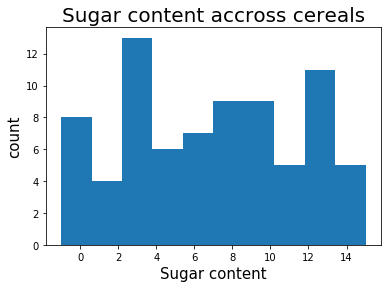

In [3]:
plt.hist(cereal.sugars)
plt.title('Sugar content accross cereals',fontsize = 20)
plt.xlabel('Sugar content',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Histogram of Vitamin content accross various Cereals

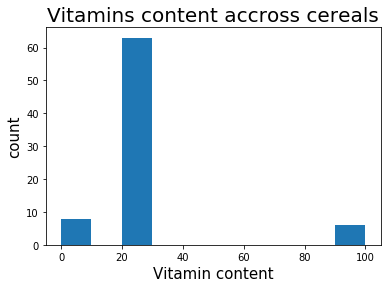

In [4]:
plt.hist(cereal.vitamins)
plt.title('Vitamins content accross cereals',fontsize = 20)
plt.xlabel('Vitamin content',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Adding a column for full name of Manufacturer

In [5]:
d = {'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs',
     'R': 'Raslston Purina','G': 'General Mills' ,
     'P' :'Post' ,'A':'American Home Foods Products'}
cereal['full_manufacture_name'] = cereal.mfr.apply(lambda x: d[x])
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,full_manufacture_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


### Bar plot for total number of Cereals manufactured by all the Manufacturers

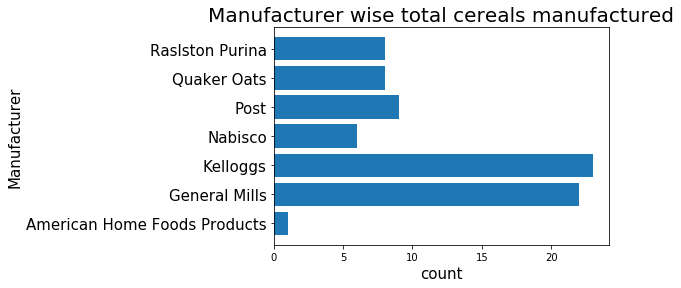

In [6]:
x = cereal.groupby('full_manufacture_name').count()
plt.barh(x.index,x.name)
plt.title('Manufacturer wise total cereals manufactured',fontsize = 20)
plt.xlabel('count',fontsize=15)
plt.ylabel('Manufacturer',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

#### Extracting data as x and y for regression

In [7]:
x = cereal[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups']]
y = cereal.rating

#### Splitting data as 75% for training and 25% for test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=100)

#### Training Linear Model and observing Mean Squared Error on test data

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression(n_jobs=1).fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_pred, y_test)

1.3236782685235236e-13